In [15]:
!mkdir  -p  ~/.kaggle
!cp  kaggle.json   ~/.kaggle/

In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

In [76]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
                                                     directory = '/content/train',
                                                     labels = 'inferred',
                                                     label_mode = 'categorical',
                                                     batch_size = 32,
                                                     image_size = (256,256)
                                                    )

Found 20000 files belonging to 2 classes.


In [77]:
test_ds = keras.utils.image_dataset_from_directory(
                                                   directory = '/content/test',
                                                   labels = 'inferred',
                                                   label_mode = 'categorical',
                                                   batch_size = 32,
                                                   image_size = (256,256)
                                                   )

Found 5000 files belonging to 2 classes.


In [78]:
#Normalization

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

In [79]:
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [88]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', padding = 'valid', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding = 'valid', strides = 2, pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding = 'valid', pool_size = (2,2), strides = 2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding = 'valid', pool_size = (2,2), strides = 2))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation = 'sigmoid'))



model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



model.fit(train_ds, epochs = 10, validation_data = test_ds)


Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 1.0054 - accuracy: 0.6279 - val_loss: 0.5753 - val_accuracy: 0.6928
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5315 - accuracy: 0.7312 - val_loss: 0.5905 - val_accuracy: 0.6482
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4610 - accuracy: 0.7843 - val_loss: 0.4433 - val_accuracy: 0.7932
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4011 - accuracy: 0.8188 - val_loss: 0.5104 - val_accuracy: 0.7742
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3237 - accuracy: 0.8556 - val_loss: 0.7377 - val_accuracy: 0.6964
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2564 - accuracy: 0.8900 - val_loss: 0.6639 - val_accuracy: 0.7516
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1764 - accuracy: 0.9315 - val_loss: 0.6146 - val_ac

In [89]:
  import cv2

In [97]:
test_image = cv2.imread('/content/test_image_cat.jpg')

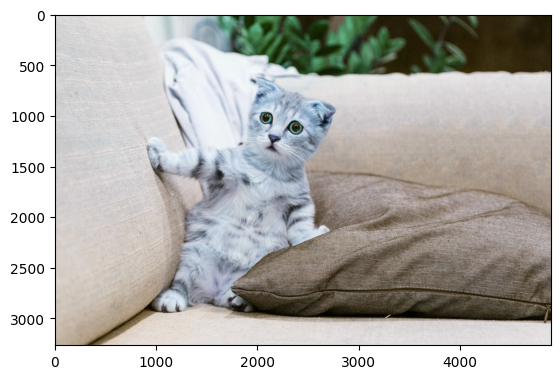

In [98]:
plt.imshow(test_image)

In [99]:
test_image.shape

(3266, 4899, 3)

In [100]:
test_image = cv2.resize(test_image, (256,256))

In [101]:
test_image.shape

(256, 256, 3)

In [102]:
test_input = test_image.reshape(1,256,256,3)

In [103]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0., 1.]], dtype=float32)